In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/Sebasleen/Seminargroup/Seminar/US%20Factors/anomalies.dta'

# Read the Stata file content
Anomalies = pd.read_stata(file_url)

# Display unique values in the 'anomaly' column
print(Anomalies['anomaly'].unique())

#Hier heb ik de global factors verwijderd
column_name = 'anomaly'
values_to_dropUS = ['glbab', 'glcma', 'glhml', 'glqmj', 'glrmw', 'glsmb', 'glumd']
ElementsUS = Anomalies[column_name].isin(values_to_dropUS)
Anomalies_US = Anomalies[~ElementsUS]

column_name = 'anomaly'
values_to_dropGF = ['ac', 'bab', 'cfp', 'cma', 'ep', 'hml', 'liq', 'ltrev', 'nsi', 'qmj', 'rmw', 'rvar',
'smb', 'strev', 'umd']
ElementsGF = Anomalies[column_name].isin(values_to_dropGF)
Anomalies_GF = Anomalies[~ElementsGF]

#Dit zijn dus alle 15 factors die alleen bij de US horen. 
print(Anomalies_US)

#En dit zijn alle 7 global factors
print(Anomalies_GF)

# Convert 'year' and 'month' columns to datetime for US factors
Anomalies_US = Anomalies_US.copy()
Anomalies_US['date'] = pd.to_datetime(Anomalies_US['year'].astype(str) + '-' + Anomalies_US['month'].astype(str).str.zfill(2))
Anomalies_US = Anomalies_US.drop(columns=['year', 'month'])

# Convert 'year' and 'month' columns to datetime for Global factors
Anomalies_GF = Anomalies_GF.copy()
Anomalies_GF['date'] = pd.to_datetime(Anomalies_GF['year'].astype(str) + '-' + Anomalies_GF['month'].astype(str).str.zfill(2))
Anomalies_GF = Anomalies_GF.drop(columns=['year', 'month'])

# Define the desired column order
desired_columns_order = ["anomaly", "date", "ret", "time", "global"]

# Reorder the columns in the US factors DataFrame
Anomalies_US = Anomalies_US.reindex(columns=desired_columns_order)

# Reorder the columns in the Global factors DataFrame
Anomalies_GF = Anomalies_GF.reindex(columns=desired_columns_order)

Anomalies_US.drop(columns=['global'], inplace=True)
Anomalies_GF.drop(columns=['global'], inplace=True)


# Display the updated DataFrames
print("US Factors:")
print(Anomalies_US)

print("\nGlobal Factors:")
print(Anomalies_GF)


['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd' 'glbab' 'glcma' 'glhml' 'glqmj' 'glrmw' 'glsmb'
 'glumd']
       year  month anomaly    ret   time  global
0      1963      7      ac  2.170   42.0     0.0
1      1963      8      ac -0.197   43.0     0.0
2      1963      9      ac  0.600   44.0     0.0
3      1963     10      ac  6.463   45.0     0.0
4      1963     11      ac -2.260   46.0     0.0
...     ...    ...     ...    ...    ...     ...
10111  2019      8     umd  7.600  715.0     0.0
10112  2019      9     umd -6.850  716.0     0.0
10113  2019     10     umd  0.240  717.0     0.0
10114  2019     11     umd -2.620  718.0     0.0
10115  2019     12     umd -2.130  719.0     0.0

[10116 rows x 6 columns]
       year  month anomaly       ret   time  global
10116  1987      2   glbab  2.236918  325.0     1.0
10117  1987      3   glbab  1.828450  326.0     1.0
10118  1987      4   glbab -5.521739  327.0     1.0
10119  1987      5   glba

      anomaly       date    ret   time  date_ordinal  Cluster
0          ac 1963-07-01  2.170   42.0        716787        0
1          ac 1963-08-01 -0.197   43.0        716818        6
2          ac 1963-09-01  0.600   44.0        716849       10
3          ac 1963-10-01  6.463   45.0        716879        4
4          ac 1963-11-01 -2.260   46.0        716910       12
...       ...        ...    ...    ...           ...      ...
10111     umd 2019-08-01  7.600  715.0        737272        2
10112     umd 2019-09-01 -6.850  716.0        737303        3
10113     umd 2019-10-01  0.240  717.0        737333       10
10114     umd 2019-11-01 -2.620  718.0        737364       12
10115     umd 2019-12-01 -2.130  719.0        737394       12

[10116 rows x 6 columns]


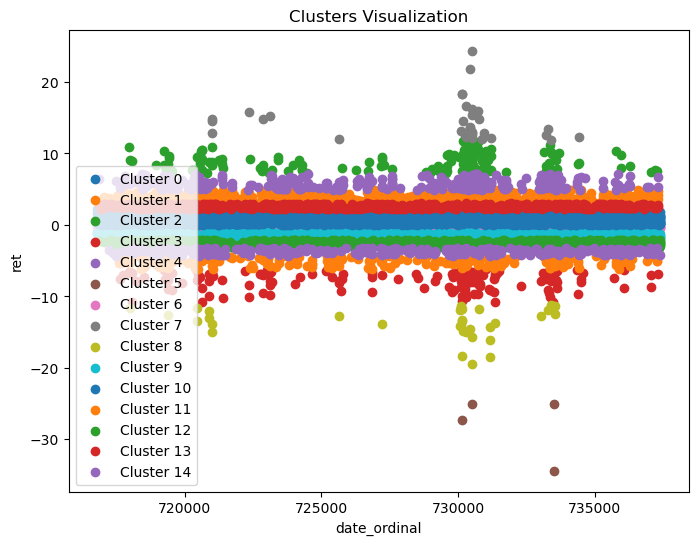

Cluster 0:
                                date          ret         time   date_ordinal  \
count                           1848  1848.000000  1848.000000    1848.000000   
mean   1990-12-08 00:43:38.181818240     1.533234   371.232697  726809.030303   
min              1963-07-01 00:00:00     0.945000    42.000000  716787.000000   
25%              1977-09-23 12:00:00     1.223750   212.750000  721985.500000   
50%              1990-01-16 12:00:00     1.510000   360.500000  726483.500000   
75%              2004-06-08 12:00:00     1.825417   533.250000  731740.500000   
max              2019-12-01 00:00:00     2.223079   719.000000  737394.000000   
std                              NaN     0.360317   191.139908    5817.815838   

       Cluster  
count   1848.0  
mean       0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  
std        0.0  


Cluster 1:
                                date         ret        time   date_ordinal  \
count         

In [19]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# Extract relevant numerical features for clustering
numerical_features = Anomalies_US[['date_ordinal', 'ret']]

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform hierarchical clustering
n_clusters = 15  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
Anomalies_US['Cluster'] = clusters

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = Anomalies_US[clusters == cluster]
    plt.scatter(cluster_points['date_ordinal'], cluster_points['ret'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()

# Print cluster statistics
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[Anomalies_US['Cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())
    print("\n")


      anomaly       date    ret   time  date_ordinal Cluster
0          ac 1963-07-01  2.170   42.0        716787     rmw
1          ac 1963-08-01 -0.197   43.0        716818     cma
2          ac 1963-09-01  0.600   44.0        716849      ac
3          ac 1963-10-01  6.463   45.0        716879    rvar
4          ac 1963-11-01 -2.260   46.0        716910     smb
...       ...        ...    ...    ...           ...     ...
10111     umd 2019-08-01  7.600  715.0        737272    rvar
10112     umd 2019-09-01 -6.850  716.0        737303    rvar
10113     umd 2019-10-01  0.240  717.0        737333      ac
10114     umd 2019-11-01 -2.620  718.0        737364     smb
10115     umd 2019-12-01 -2.130  719.0        737394     smb

[10116 rows x 6 columns]


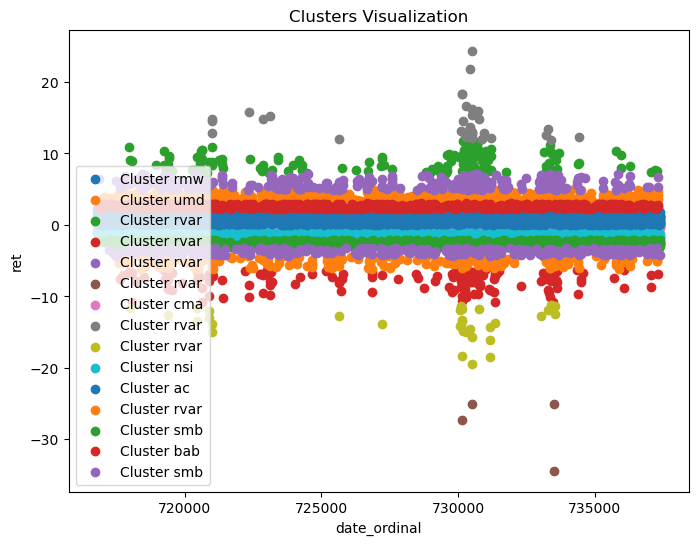

Cluster rmw:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster umd:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster rvar:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster rvar:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster rvar:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster rvar:
['rvar' 'umd']

Cluster cma:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster rvar:
['bab' 'hml' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar' 'smb' 'strev' 'umd']

Cluster rvar:
['bab' 'cfp' 'ep' 'hml' 'liq' 'rmw' 'rvar' 'smb' 'strev' 'umd']

Cluster nsi:
['ac' 'bab' 'cfp' 'cma' 'ep' 'hml' 'liq' 'ltrev' 'nsi' 'qmj' 'rmw' 'rvar'
 'smb' 'strev' 'umd']

Cluster ac:
['ac' 'bab' 'cfp' 'cma' 

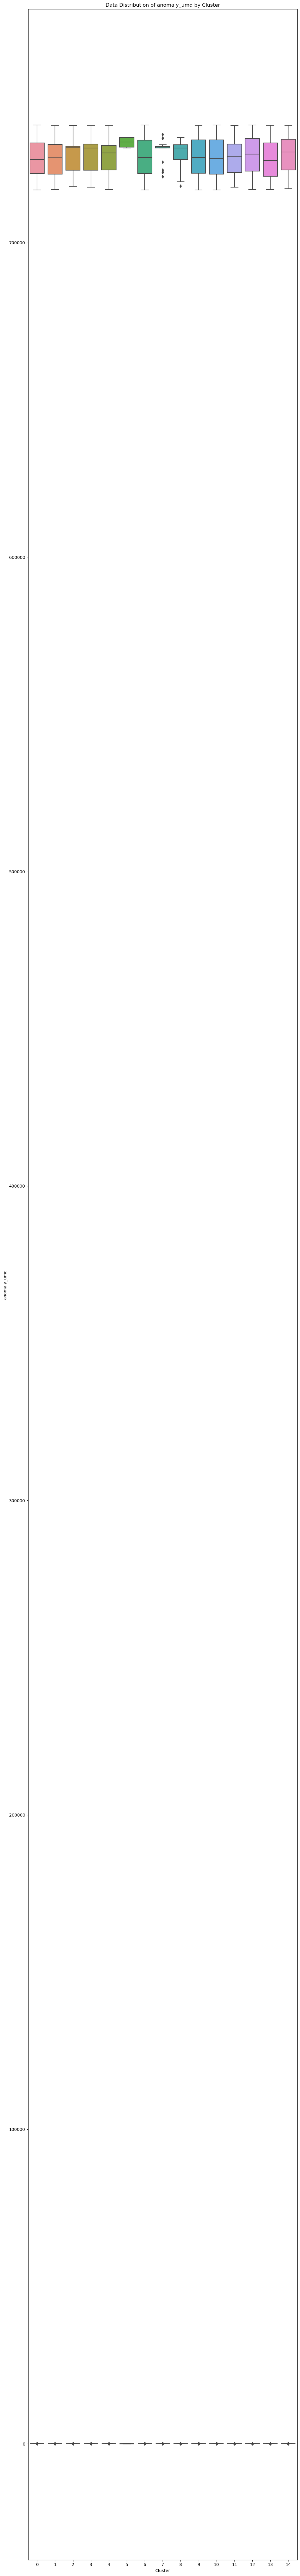

In [23]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# One-hot encode the 'anomaly' column
encoder = OneHotEncoder()
anomaly_encoded = encoder.fit_transform(Anomalies_US[['anomaly']])

# Combine one-hot encoded anomaly with numerical features
features = pd.concat([Anomalies_US[['date_ordinal', 'ret']], pd.DataFrame(anomaly_encoded.toarray(), columns=encoder.get_feature_names_out(['anomaly']))], axis=1)

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform hierarchical clustering
n_clusters = 15  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

# Add cluster names to the DataFrame
Anomalies_US['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = Anomalies_US[clusters == cluster]
    plt.scatter(cluster_points['date_ordinal'], cluster_points['ret'], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()


# Determine the anomalies present in each cluster
cluster_anomalies = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    cluster_anomalies[cluster] = cluster_data['anomaly'].unique()

# Display anomalies present in each cluster
for cluster, anomalies in cluster_anomalies.items():
    print(f"Cluster {cluster_names[cluster]}:")
    print(anomalies)
    print()

# Create boxplots for each feature within each cluster
plt.figure(figsize=(10, 5*len(features.columns)))

# Plot data distribution for each feature within each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(data=features, x=clusters, y=feature)
    plt.title(f'Data Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


      anomaly       date       ret   time  date_ordinal Cluster
10116   glbab 1987-02-01  2.236918  325.0        725403   glqmj
10117   glbab 1987-03-01  1.828450  326.0        725431   glqmj
10118   glbab 1987-04-01 -5.521739  327.0        725462   glbab
10119   glbab 1987-05-01 -0.513814  328.0        725492   glbab
10120   glbab 1987-06-01  1.579217  329.0        725523   glqmj
...       ...        ...       ...    ...           ...     ...
12638   glumd 2019-08-01  2.990000  715.0        737272   glbab
12639   glumd 2019-09-01 -3.260000  716.0        737303   glsmb
12640   glumd 2019-10-01 -0.940000  717.0        737333   glsmb
12641   glumd 2019-11-01  0.000000  718.0        737364   glsmb
12642   glumd 2019-12-01  0.740000  719.0        737394   glsmb

[2527 rows x 6 columns]


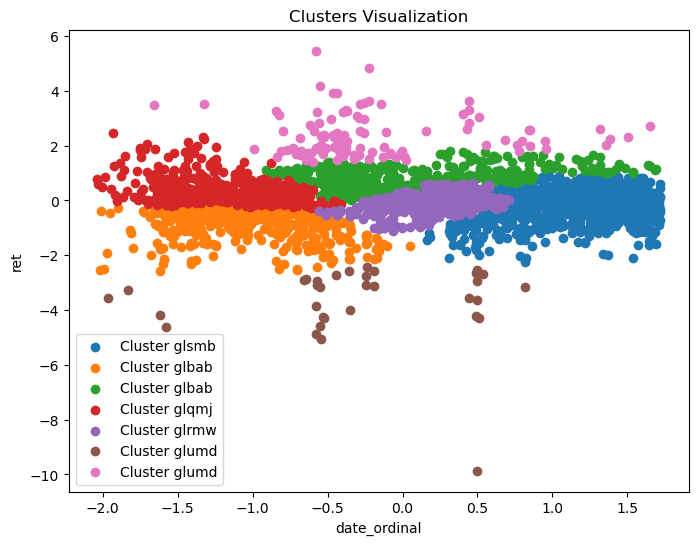

In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_GF['date_ordinal'] = pd.to_datetime(Anomalies_GF['date']).apply(lambda x: x.toordinal())

# Extract relevant numerical features for clustering
numerical_features = Anomalies_GF[['date_ordinal', 'ret']]

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform hierarchical clustering
n_clusters = 7  # Choose the number of clusters
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = agglomerative_clustering.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
Anomalies_GF['Cluster'] = clusters
# Add cluster names to the DataFrame
# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_GF[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

Anomalies_GF['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_GF)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = scaled_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = numerical_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('ret')
plt.ylabel('time')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Load your dataset into a DataFrame (assuming it's already loaded)
# If not loaded, load it using pd.read_csv(), pd.read_excel(), or pd.read_stata() depending on the file format

# Assuming your DataFrame is named 'df'

# Perform agglomerative hierarchical clustering
# Specify the number of clusters you want
n_clusters = 3
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data
clusters = agglomerative_clustering.fit_predict(df)

# Plot dendrogram (optional but useful for visualizing hierarchy)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # Using features from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
# Call the dendrogram function to plot the dendrogram
plot_dendrogram(agglomerative_clustering, labels=agglomerative_clustering.labels_)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Add the cluster labels to your DataFrame
df['Cluster'] = clusters


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Anomalies_GF DataFrame is already loaded and preprocessed

# Convert 'date' column to ordinal numbers
Anomalies_US['date_ordinal'] = pd.to_datetime(Anomalies_US['date']).apply(lambda x: x.toordinal())

# One-hot encode the 'anomaly' column
encoder = OneHotEncoder()
anomaly_encoded = encoder.fit_transform(Anomalies_US[['anomaly']])

# Combine one-hot encoded anomaly with numerical features
features = pd.concat([Anomalies_US[['date_ordinal', 'ret']], pd.DataFrame(anomaly_encoded.toarray(), columns=encoder.get_feature_names_out(['anomaly']))], axis=1)

# Exclude 'date_ordinal' from the numerical features to be standardized
numerical_features_for_scaling = Anomalies_US[['ret']]

# Standardize the numerical features (excluding 'date_ordinal')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features_for_scaling)

# Perform k-means clustering
n_clusters = 15  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters)
clusters = kmeans.fit_predict(scaled_features)

# Determine the most common anomaly in each cluster
cluster_names = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    most_common_anomaly = cluster_data['anomaly'].value_counts().idxmax()
    cluster_names[cluster] = most_common_anomaly

# Add cluster names to the DataFrame
Anomalies_US['Cluster'] = [cluster_names[cluster] for cluster in clusters]

# Display the DataFrame with cluster labels
print(Anomalies_US)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in cluster_names.keys():
    cluster_points = scaled_features[clusters == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_names[cluster]}')

plt.title('Clusters Visualization')
plt.xlabel('date_ordinal')
plt.ylabel('ret')
plt.legend()
plt.show()

# Determine the anomalies present in each cluster
cluster_anomalies = {}
for cluster in range(n_clusters):
    cluster_data = Anomalies_US[clusters == cluster]
    cluster_anomalies[cluster] = cluster_data['anomaly'].unique()

# Display anomalies present in each cluster
for cluster, anomalies in cluster_anomalies.items():
    print(f"Cluster {cluster_names[cluster]}:")
    print(anomalies)
    print()

# Create boxplots for each feature within each cluster
plt.figure(figsize=(10, 5*len(features.columns)))

# Plot data distribution for each feature within each cluster
for i, feature in enumerate(features.columns):
    sns.boxplot(data=features, x=clusters, y=feature)
    plt.title(f'Data Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


      anomaly       date    ret   time  date_ordinal Cluster
0          ac 1963-07-01  2.170   42.0        716787     bab
1          ac 1963-08-01 -0.197   43.0        716818      ac
2          ac 1963-09-01  0.600   44.0        716849     rmw
3          ac 1963-10-01  6.463   45.0        716879    rvar
4          ac 1963-11-01 -2.260   46.0        716910   ltrev
...       ...        ...    ...    ...           ...     ...
10111     umd 2019-08-01  7.600  715.0        737272    rvar
10112     umd 2019-09-01 -6.850  716.0        737303    rvar
10113     umd 2019-10-01  0.240  717.0        737333      ac
10114     umd 2019-11-01 -2.620  718.0        737364   ltrev
10115     umd 2019-12-01 -2.130  719.0        737394   ltrev

[10116 rows x 6 columns]


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>